
## BLS Part II: Consumer Price Index Analysis

In [71]:
import pandas as pd

cpi = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/cpi_analysis_22.csv')
print('\n', "Series ID: CUUR0000SA0", '\n', "Consumer Price Index")
cpi.head()


 Series ID: CUUR0000SA0 
 Consumer Price Index


,Series ID,Year,Period,Label,Value
0,CUUR0000SA0,2010,M01,2010 Jan,216.687
1,CUUR0000SA0,2010,M02,2010 Feb,216.741
2,CUUR0000SA0,2010,M03,2010 Mar,217.631
3,CUUR0000SA0,2010,M04,2010 Apr,218.009
4,CUUR0000SA0,2010,M05,2010 May,218.178


In [19]:
year_filter["Year"] = df['Year']> 2010
year_filter["Year"]

0      True
1      True
2      True
3      True
4      True
       ... 
116    True
117    True
118    True
119    True
120    True
Name: Year, Length: 121, dtype: bool

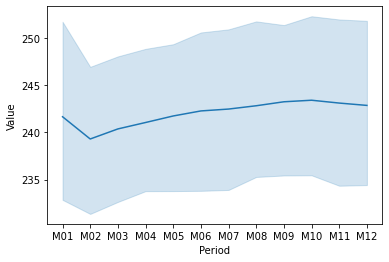

In [12]:
# Over a ten-year period
import seaborn as sns

sns.lineplot(cpi['Period'], cpi['Value']);

In [13]:
df = pd.read_csv('/Users/jasonrobinson/Downloads/file-6.csv')
df.head()

,Series ID,Year,Period,Label,Value
0,CUSR0000SA0,2012,M01,2012 Jan,227.842
1,CUSR0000SA0,2012,M02,2012 Feb,228.329
2,CUSR0000SA0,2012,M03,2012 Mar,228.807
3,CUSR0000SA0,2012,M04,2012 Apr,229.187
4,CUSR0000SA0,2012,M05,2012 May,228.713


In [20]:
cpi.shape, df.shape

((145, 5), (121, 5))

In [21]:
cpi.describe()

,Year,Value
count,145.000000,145.000000
mean,2015.544828,242.019290
std,3.494001,15.109996
min,2010.000000,216.687000
25%,2013.000000,231.407000
50%,2016.000000,238.343000
75%,2019.000000,252.776000
max,2022.000000,281.148000


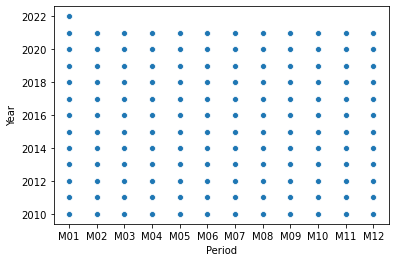

In [31]:
sns.scatterplot(cpi['Period'], cpi['Year']);

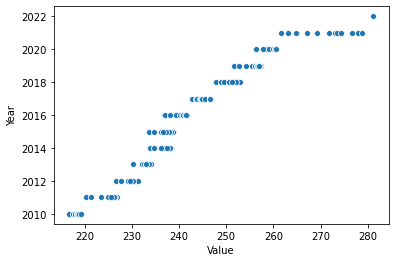

In [32]:
sns.scatterplot(cpi['Value'], cpi['Year']);

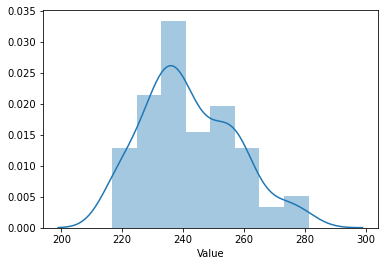

In [48]:
# Get a visual of the distribution of values
sns.distplot(cpi['Value']);

In [54]:
import plotly.graph_objects as go
#go.Histogram(x=cpi['Value'])
display(go.Figure(data=go.Histogram(x=cpi['Value'])))

In [ ]:
"""
What model can we use to predict the CPI? The only thing we need to do is 
a linear regression or random forest. However, we have an extremely small
dataset.
"""
# How do we split the data into training and testing sets?
# We can use the sklearn library to split the data into training and testing. 
# Our 

In [55]:
# Create a function to iterate through the months and years
# for each observation

def iterate_months(df):
    for i in range(0, len(df)):
        yield df.iloc[i]['Month'], df.iloc[i]['Year']

In [ ]:
# Filter the values to .2f for example: 143.3452 ~> 143.35
def filter_values(value):
    return round(value, 2)

In [ ]:
# We need to preprocess the data to get the values in the correct format
# for the plotly graph
def preprocess_data(df):
    df['Period'] = df['Period'].apply(lambda x: x.split('-')[1])
    df['Period'] = df['Period'].apply(lambda x: int(x))
    df['Year'] = df['Year'].apply(lambda x: int(x))
    df['Value'] = df['Value'].apply(lambda x: filter_values(x))
    return df

In [ ]:
# Standardize the data value column using sklearn
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(cpi['Value'].values.reshape(-1, 1))

In [ ]:
# Scale the data
cpi['Value'] = scaler.transform(cpi['Value'].values.reshape(-1, 1))

In [ ]:
# Now we can split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cpi['Value'], cpi['Year'], test_size=0.2, random_state=42)

X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
# We can now fit the model to the training data
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# We can now predict the values for the test data
y_pred = lr.predict(X_test)

In [84]:
# Now we can plot the data
import plotly.graph_objects as go
import plotly.express as px

fig = px.scatter(
    cpi, x="Value", y="Year", color="Series ID",
    trendline="ols", trendline_color_override="#0072B2",
        size="Value", animation_frame="Year")
fig.show()